In [1]:
#import all of your libraries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import gzip
import pickle
from collections import Counter
import statistics
import math
import re
import pandas as pd
import seaborn as sns

In [2]:
#see where you are
% pwd

'/data/directory_name/directory_with_fastqs/new_UMI_folder'

In [3]:
#go to your desired folder will the downloaded fatsq
cd ../../SRTP-project/

/data/directory_name/directory_with_fatsqs


In [4]:
#list all of your files to select which fastqs you want to analyze
ls */*

IDT_001_S300_L005/IDT_001_S300_L005_R2_001.fasta
IDT_001_S300_L005/IDT_001_S300_L005_R2_001.fastq*
IDT_005_S299_L005/IDT_005_S299_L005_R1_001.fastq.gz*
IDT_005_S299_L005/IDT_005_S299_L005_R2_001.fastq.gz*
IDT_0_1_S302_L005/IDT_0_1_S302_L005_R1_001.fastq.gz*
IDT_0_1_S302_L005/IDT_0_1_S302_L005_R2_001.fastq.gz*
IDT_025_S304_L005/IDT_025_S304_L005_R1_001.fastq.gz*
IDT_025_S304_L005/IDT_025_S304_L005_R2_001.fastq.gz*
IDT_025x_S305_L005/IDT_025x_S305_L005_R1_001.fastq.gz*
IDT_025x_S305_L005/IDT_025x_S305_L005_R2_001.fastq.gz*
IDT_0_5_S301_L005/IDT_0_5_S301_L005_R1_001.fastq.gz*
IDT_0_5_S301_L005/IDT_0_5_S301_L005_R2_001.fastq.gz*
IDT_H2O_S303_L005/IDT_H2O_S303_L005_R1_001.fastq.gz*
IDT_H2O_S303_L005/IDT_H2O_S303_L005_R2_001.fastq.gz*
rubi_001_S293_L005/last-12-commands.txt
rubi_001_S293_L005/rubi_001_S293_L005_R1_001.fastq.gz*
rubi_001_S293_L005/rubi_001_S293_L005_R2_001.fastq.gz*
rubi_005_S292_L005/rubi_005_S292_L005_R1_001.fastq.gz*
rubi_005_S292_L005/rubi_005_S292_L005_R1_001.SHORT.fastq

In [5]:
#open the recently unzipped file and put it in a readable version
#step 1
def read_in_UMI_file_1_2(UMI_file):
    """opening and reading a zipped UMI fastq file (in a readable version) and reading in the lines"""
    #reading in the file and converting the bite strings to strings
    with gzip.open(UMI_file, 'rb') as file_2:
        #read the lines of the list in the file
        file_list_UMI_2 = file_2.readlines()
    #returning the file
    return(file_list_UMI_2)

#https://pythonadventures.wordpress.com/2010/10/19/hamming-distance/
def hamming_distance(s1, s2):
    assert len(s1) == len(s2)
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))
    
#step 2 (do for each file you want to read in; Read 1 and Read 2) with UMIs that are 6bp in length (for each read)!
def UMI_code(file_list_UMI_R1, file_list_UMI_R2):
    """using an opened UMI fastq file R1 anf R2 to cut out ONLY the UMI's on the same read 
    and combining the UMIs in R1 to R2 
    (on the 2nd line of each entry) 
    and add it to a dictionary (counting the number of occurances of each glued UMI)"""
    #making a dictionary of UMIs R1 and R2 to count later
    dictionary_UMIs_R1_R2_glued = {}
    #staring the count of the lines
    count = 1
    R1_R2 = zip(file_list_UMI_R1, file_list_UMI_R2)
    #looking at each line in Read 1 and Read 2 file that are on the same line
    for each_line, the_same_line in R1_R2:
        #print(count) if you want
        #decode each bite string into a string
        each_line = each_line.decode("utf-8")
        the_same_line = the_same_line.decode("utf-8")
        #split each line at the 0 position
        each_line_2 = each_line.split(" ")[0]
        the_same_line_2 = the_same_line.split(" ")[0]
        #if the count is divisable by 4 with a remainder of 1 (the 1st line of the fatsq)
        if count %4 == 1:
            #if the line value in Read 1 does not equal the line value in Read 2:
            if each_line_2 != the_same_line_2:
                #raise an error
                raise ValueError('error in read ordering. R1 and R2 are not in similar order.' + str(count) + 'read line where error is occurring.')
        #now, if the count is divisable by 4 with a remainder of 2 (the second line of the fastq)
        if count %4 == 2:
            #checking if there is the letter N at the first position (on the second line and every 4th line thereafter)
            if each_line_2[0] == 'N' and the_same_line_2[0] == 'N':
                #checking to see if the glued UMI is in the dictionary
                if (each_line_2[1:6] + the_same_line_2[1:6]) in dictionary_UMIs_R1_R2_glued:
                    #if it is in the dicitonary, add 1
                    dictionary_UMIs_R1_R2_glued[each_line_2[1:6] + the_same_line_2[1:6]] += 1
                #if it is not in the dictionary add it to the dictioinary and start the count at 1
                else:
                    dictionary_UMIs_R1_R2_glued[each_line_2[1:6] + the_same_line_2[1:6]] = 1
            #add the UMIs to the dicitonary at position 0-6 (if the string does not start with the letter N)
            else:
                #if the UMIs are already in the dicitonary:
                if (each_line_2[0:6] + the_same_line_2[0:6]) in dictionary_UMIs_R1_R2_glued:
                    #add the value 1
                    dictionary_UMIs_R1_R2_glued[each_line_2[0:6] + the_same_line_2[0:6]] += 1
                #if it is not in the dicitonary, add it to the dictionary and start the count at 1
                else:
                    dictionary_UMIs_R1_R2_glued[each_line_2[0:6] + the_same_line_2[0:6]] = 1
        #increase the count each time in your for loop
        count += 1
    #return your new dictionary with R1 and R2 UMIs glued together and ther values of occurance
    return(dictionary_UMIs_R1_R2_glued)

In [323]:
#using the functions (do this for each pair of gzipped fastq files)
UMI_open_list_R1 = read_in_UMI_file('rubi_005_S292_L005/rubi_005_S292_L005_R1_001.fastq.gz')
#using the functions
UMI_open_list_R2 = read_in_UMI_file('rubi_005_S292_L005/rubi_005_S292_L005_R2_001.fastq.gz')
#defining the variable (calling the function)
UMI_dictionary_R1_R2 = UMI_code(UMI_open_list_R1, UMI_open_list_R2)
#pickling a file (saving a file to disk on the server) with the UMI dicitonary and its new text file
pickle.dump(UMI_dictionary_R1_R2, open('rubicon_005_S299_R1_R2_UMI_dictionary_glued', 'wb'))

In [6]:
#opening the pickled file into a readable file
rubicon_005_R1_R2_dictionary_glued = pickle.load(open('rubicon_005_S299_R1_R2_UMI_dictionary_glued','rb'))

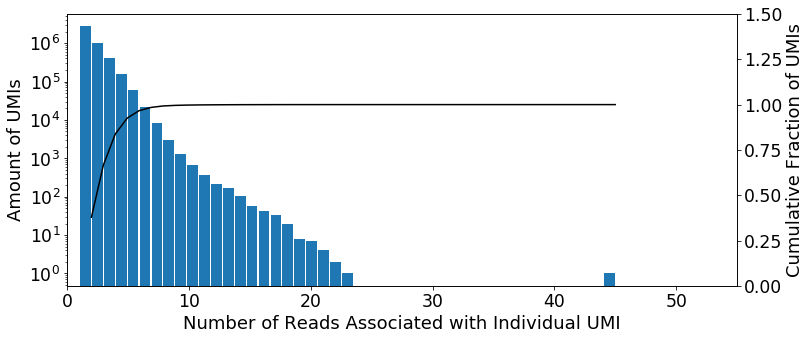

In [13]:
#add hamming distance here (if you want):
#x= hamming
#setting the x and y axis inputs to the dictionary keys and dictionary values
x = list(rubicon_H2O_R1_R2_dictionary_glued.keys())
y = list(rubicon_H2O_R1_R2_dictionary_glued.values())
#labeling the figures and axes
fig, axs1 = plt.subplots(figsize = (12,5)) 
#adding the x and y labels on each axis
axs1.set_xlabel('Number of Reads Associated with Individual UMI', fontsize = 18)
axs1.set_ylabel('Amount of UMIs', fontsize = 18)
#second y axes:
axs2 = axs1.twinx()
axs2.set_ylabel('Cumulative Fraction of UMIs', fontsize = 18)


#setting the bins on the x axis to log base 2 (if you want)
#my_bins = np.logspace(np.log2(min(y)), np.log2(max(y) + 100), base = 2)
my_bins = 45
axs1.hist(y, density = False, align = 'mid', log = True, bins = my_bins, rwidth = .9)

n_bins = 45
#setting the percent line
#making the bins and counting the bins
counts, bin_edges = np.histogram(y, bins = n_bins, normed = True)
#emptying the buckets or bins
counts = np.zeros(len(counts))
#spacing out the bins
for each_variable in y:
    #for each_edge in bin_edges:
    for ele_position, each_edge in enumerate(bin_edges):
        #if every count is in the bin (in the domain of the bin)
        if each_variable < each_edge:
        #add each_variable to count[each_variable]
            #counts[ele_position - 1] + each_variable
            counts[ele_position -1] = counts[ele_position - 1] + each_variable
            #break at that bin
            break
#making the cumulative distribution
cdf = np.cumsum(counts)

#setting the bin edges in the second graph 2
axs2.plot(bin_edges[1:], cdf/cdf[-1], color = 'k')

#setting the x and y scales to linear or log and the range and domain of the axes
axs1.set_yscale('log')
#axs1.set_xscale('log', basex = 2)
axs1.set_xscale('linear')
axs2.set_yscale('linear')
axs1.set_xlim(0,55)
axs2.set_ylim(0,1.5)

#setting the ticklabel size
axs1.tick_params(labelsize = 'xx-large')
axs2.tick_params(labelsize = 'xx-large')

#adding an average distribution line
#plt.axvline(y.mean(), color = 'k', linestyle = 'dashed', linewidth = 1)

#adding the graph titles
fig.suptitle('Categorical Plotting of UMIs with 5ng (Top) and Blank (Bottom) HeLa RNA Input and Cumulative Fraction of UMI Occurance')
#saving the figure in png format
fig.savefig('rubicon_H2O_R1_R2_dictionary_glued_log2_linear%.png')

In [15]:
#Counter(rubicon_H2O_R1_R2_dictionary_glued).most_common()
#to determine your bin edges and set them accordingly in your histogram
bin_edges

array([ 1.        ,  1.55555556,  2.11111111,  2.66666667,  3.22222222,
        3.77777778,  4.33333333,  4.88888889,  5.44444444,  6.        ,
        6.55555556,  7.11111111,  7.66666667,  8.22222222,  8.77777778,
        9.33333333,  9.88888889, 10.44444444, 11.        , 11.55555556,
       12.11111111, 12.66666667, 13.22222222, 13.77777778, 14.33333333,
       14.88888889, 15.44444444, 16.        , 16.55555556, 17.11111111,
       17.66666667, 18.22222222, 18.77777778, 19.33333333, 19.88888889,
       20.44444444, 21.        , 21.55555556, 22.11111111, 22.66666667,
       23.22222222, 23.77777778, 24.33333333, 24.88888889, 25.44444444,
       26.        ])

In [75]:
#len(rubicon_005_R1_R2_dictionary_glued)
#looking at the length of your dictionary
len(rubicon_H2O_R1_R2_dictionary_glued)

4435970

In [ ]:
#defining the function to write the most common UMIs in each dictionary into a new file
def write_most_common_UMIs(UMI_dictionary, UMI_dictionary_name):
    """defining the function to write the 10 most common UMIs in the dictionary
    and take out the amount of times the UMI occurs and divide it by the total amount of UMIs in the dicitonary"""
    #opening a new file in a write version to write the most common UMIs and the percent they acocunt for the sample
    most_common_UMIs = open(UMI_dictionary_name, 'w')
    #for each UMI in the dicitonary:
    #select the 10 most common UMIs
    for each_word_UMI in Counter(UMI_dictionary).most_common(10):
        #take the number of the UMI (how often it occurs) in the list of tuples 
        #and divide by the total value of dictionary
        #x 100%
        UMI_percent = each_word_UMI[1] / sum(UMI_dictionary.values()) * 100
        #repeat for each 10 UMIs
        UMI_name = each_word_UMI[0]
        #add the UMI name with the percent on the same line
        UMI_name_percent = (UMI_dictionary_name + "," + UMI_name + "," + str(UMI_percent) +'\n')
        
        #write into the new file
        most_common_UMIs.write(UMI_name_percent)

    #close the new file
    most_common_UMIs.close()    

In [ ]:
#writing the new file with the top 10 UMIs and their percent of occruance in the entire sample
#calling the function (dictionary you are looking at, the new file name you are writing into)
write_most_common_UMIs(rubicon_005_R1_R2_dictionary_glued, 'rubi_0_5_R1_R2_UMIs_glued')

write_most_common_UMIs(rubicon_005_R1_R2_dictionary_glued, 'rubi_005_R1_R2_UMIs_glued')

write_most_common_UMIs(rubicon_0_1_R1_R2_dictionary_glued, 'rubi_0_1_R1_R2_UMIs_glued')

write_most_common_UMIs(rubicon_025_R1_R2_dictionary_glued, 'rubi_025_R1_R2_UMIs_glued')

write_most_common_UMIs(rubicon_001_R1_R2_dictionary_glued, 'rubi_001_R1_R2_UMIs_glued')

write_most_common_UMIs(rubicon_H2O_R1_R2_dictionary_glued, 'rubi_H2O_R1_R2_UMIs_glued')

In [49]:
#quickly displaying the top 10 UMIs in the dictionary and the amount fo READS they account for in R1 and R2
Counter(rubicon_005_R1_R2_dictionary_glued).most_common(10)

[('AGATCGAGATCG', 26),
 ('CTGTCACGTGTG', 15),
 ('CCTTTACGTGTG', 14),
 ('TTGGCTCGTGTG', 13),
 ('TAAATCCGTGTG', 13),
 ('TGTCAACGTGTG', 13),
 ('GGTTATCGTGTG', 13),
 ('GTTTAGCGTGTG', 12),
 ('TTTATCTGGGTT', 12),
 ('TTGTATCGTGTG', 12)]

In [19]:
def the_top_UMIs(most_common_UMI, file_that_UMI_corresponds_to):
    """defining a function to take the most common reads with the top UMI
    and defining it as the reads with the most common UMI to use later"""
    #with the most common UMI, sort through the fastq file and put it in a readable version:
    #final all of the reads with that UMI in the fastq file
    desired_list = read_in_UMI_file(file_that_UMI_corresponds_to)
    position_count = 3
    number_of_different_reads_with_the_same_UMI = 0
    new_list_with_filtered_reads = []
    for content in desired_list:
        #make a new list of all of the reads and count the list (add 1)
        if position_count %4 == 0:
            position_count = 1
            #make a new list with the read sequences
            content = content.decode("utf-8")
            #check if UMI is there
            if most_common_UMI in content[0:6]:
                new_list_with_filtered_reads.append(content)
        position_count += 1
            #if the first element of the list does not equal the second element of the list add 1
    new_count_in_new_list = 0
    #for the read in the new list with filtered reads
    #for content in new_list_with_filtered_reads:
    #    if new_list_with_filtered_reads[0] != new_list_with_filtered_reads[1]: 
    #        new_count_in_new_list += 1
    new_dictionary_with_UMIs_count = Counter(new_list_with_filtered_reads) 
    #for every_sequence in new_dictionary_with_UMIs_count.keys():
        #for each_seq in new_dictionary_with_UMIs_count.keys():
            #hamming_distance_count = hamming_distance(every_sequence, each_seq)
            #print(hamming_distance_count)
            #if hamming_distance_count > :      
    print(len(new_dictionary_with_UMIs_count))
    return(new_dictionary_with_UMIs_count)
#def top_10_UMI_variance(reads_with_most_common_UMI):
#"""making a function showing the amount of variance between all of the reads containging the most common UMI
    #and the percent that UMI accounts for the entire sample"""
    

In [117]:
top_1_10_UMIs_rubi_005 = the_top_UMIs('CGTGTGC', 'rubi_005_S292_L005/rubi_005_S292_L005_R1_001.fastq.gz')

240


In [ ]:
#making a heat map with your top 1 UMI and all of its corresponding sequences and comparing them
#manually insert top 10 UMI file name
#WARNING: heat map not needed and has a long run time
pandas_series = pd.Series(top_1_10_UMIs_IDT_005)
pandas_series_sorted = pandas_series.sort_values(ascending = False)

#print(pandas_series_sorted.head(30).index)
dataframe_blank = {}
pandas_series_sorted_array = []
minimum_hamming_distance = 100000000
maximum_hamming_distance = -100000000
for each_series in pandas_series_sorted.index:
    dataframe_blank[each_series] = {}
    for every_index in pandas_series_sorted.index:
        hamming_distance_count = hamming_distance(each_series, every_index)
        
        dataframe_blank[each_series][every_index] = hamming_distance_count
        #print(hamming_distance_count)
        if hamming_distance_count > 0:
            hamming_distance_count_2 = hamming_distance_count
            if hamming_distance_count_2 < minimum_hamming_distance:
                minimum_hamming_distance = hamming_distance_count
        if hamming_distance_count > maximum_hamming_distance:
            maximum_hamming_distance = hamming_distance_count
        if hamming_distance_count > 0:
            pandas_series_sorted_array.append(hamming_distance_count)
pandas_series_sorted_array.sort()
#print(pandas_series_sorted_array)

df = pd.DataFrame.from_dict(dataframe_blank)
df = df[df.index]

print(len(pandas_series_sorted.index))
print(df.shape)

plt.savefig('heatmap_plot.pdf', height=15, width=15)
sns.heatmap(df, cmap = "Blues_r", xticklables = False, yticklables = False)


In [83]:
print(minimum_hamming_distance)
print(maximum_hamming_distance)
#print(pandas_series_sorted)

1
105
0


In [ ]:
pandas_series_sorted.head(n=100).plot(kind='bar')
#making a fasta a file with the soted UMI and thair unique sequences (in the dictionary)
top_1_10_UMIs_rubi_025 = open('top_1_10_UMIs_rubi_025.fasta', 'w')
for every_sequence in top_1_10_UMIs_rubi_025.keys():
    top_1_10_UMIs_rubi_025.write('>\n' + every_sequence)
top_1_10_UMIs_rubi_025.close()

In [ ]:
def fasta_with_top_UMI_sequences(top_UMI, file_that_UMI_correcponds_to):
    every_sequence_with_that_UMI = open('top_UMI_with_sequences','w')
    for every_sequence_with_that_UMI in file_that_UMI_correcponds_to:
        every_sequence_with_that_UMI.write('>\n' + every_sequence_with_that_UMI)
    every_sequence_with_that_UMI.close()

In [ ]:
#defining a function to count the line that the sequence + specified UMI is on in each R1 and R2 files
#WARNING: funtion not yet complete and has a long run time
def UMI_sequences(specified_UMI, R1_file_that_UMI_corresponds_to, R2_file_that_UMI_corresponds_to):
    """using an opened UMI fastq file R1 and R2 to count which lines a sequence + specified UMI is on, 
    and writting all of those sequences to a new fasta file
    to run cd hit once compressed"""
    #making a fasta a file with the soted UMI and thair unique sequences (in the dictionary)
    top_UMI_with_sequences = open('top_UMI_with_sequences.fasta', 'w')
    #making a dictionary to write the line numbers and equivalent sequences in to
    dictionary_of_UMI_lines_and_sequences_1 = {}
    dictionary_of_UMI_lines_and_sequences_2 = {}
    #count = 1
    #unzipping the compressed files
    argument_1 = specified_UMI[0:6]
    argument_2 = specified_UMI[7:12]
    #making a for loop to select each sequence in R1 and R2 with the specified UMI (on the same line)
    #write the entire sequence (with that UMI) on to a new fasta file
    zgrep_output_1 = ! zgrep -n ^$argument_1 $R1_file_that_UMI_corresponds_to
    zgrep_output_2 = ! zgrep -n ^$argument_2 $R2_file_that_UMI_corresponds_to
    #split the string (an element of the list) and compare the first element of the split string
    #if the first element (a number) of the string in the first file, 
    #equals the first element (number) of the string in the second file, 
    #write the corresponding sequence (at position 1 of the string) to a new file
    for each_sequence_1 in zgrep_output_1:
        zgrep_output_1_number = each_sequence_1.split(":")[0]
        zgrep_output_1_sequence = each_sequence_1.split(":")[1]
        #add the zgrep output numbers (the 0 position) to the dictionary 1 as the keys
        #add the zgrep output sequences (the 1 position) to the dicitonary 1 as the values
        dictionary_of_UMI_lines_and_sequences_1([(each_sequence_1.split(":")[0], each_sequence_1.split(":")[1]) + '\n'])
    for each_sequence_2 in zgrep_output_2:
        zgrep_output_2_number = each_sequencce_2.split(":")[0]
        zgrep_output_2_sequence = each_sequence_2.split(":")[1]
        #add the zgrep output numbers (the 0 position) to the dictionary 2 as the keys
        #add the zgrep output sequences (the 1 position) to the dicitonary 2 as the values
        dictionary_of_UMI_lines_and_sequences_2([(each_sequence_2.split(":")[0], each_sequence_2.split(":")[1]) + '\n'])
    for each_number_1 in dictionary_of_UMI_lines_and_sequences_1.keys():
        if each_number_1 in dictionary_of_UMI_lines_and_sequences_2:
            top_UMI_with_sequences.write(dictionary_of_UMI_lines_and_sequences_1[zgrep_output_1_number] + dictionary_of_UMI_lines_and_sequences_2[zgrep_output_2_number] + '\n')
    top_UMI_with_sequences.close()

In [ ]:
#calling the function with the top UMI (R! and R2 together) and the two files that UMI is from
UMI_sequences('AGATCGAGATCG', 'rubi_025_S297_L005/rubi_025_S297_L005_R1_001.fastq.gz', 'rubi_025_S297_L005/rubi_025_S297_L005_R2_001.fastq.gz')

In [ ]:
#test zgrep function
R1_file_that_UMI_corresponds_to = 'rubi_025_S297_L005/rubi_025_S297_L005_R1_001.fastq.gz'
R2_file_that_UMI_corresponds_to = 'rubi_025_S297_L005/rubi_025_S297_L005_R2_001.fastq.gz'
specified_UMI = 'AGATCGAGATCG'
#unzipping the compressed files
argument_1 = specified_UMI[0:6]
argument_2 = specified_UMI[7:12]
#making a for loop to select each sequence in R1 and R2 with the specified UMI (on the same line)
#write the entire sequence (with that UMI) on to a new fasta file
zgrep_output_1 = ! zgrep -n ^$argument_1 $R1_file_that_UMI_corresponds_to
zgrep_output_2 = ! zgrep -n ^$argument_2 $R2_file_that_UMI_corresponds_to
#for each_output_1, each_output_2 in zgrep_output_1, zgrep_output_2:
zgrep_output_1_split = zgrep_output_1.split(":")[0]
zgrep_output_2_split = zgrep_output_2.split(":")[0]
print(zgrep_output_1_split)
print(zgrep_output_2_split)

In [45]:
zgrep_output_1_split = zgrep_output_1[0].split(":")[0]
zgrep_output_2_split = zgrep_output_2[0].split(":")[0]
print(zgrep_output_1_split)
print(zgrep_output_2_split)

17538
3682


In [34]:
! zgrep -n ^$argument_1 $R1_file_that_UMI_corresponds_to | head -10

17538:AGATCGAGTAGCTCACGCCCCCCCCCTCCACGCGCCCCGCGCGCGCGGGAGGGCGCGTGCCCCGCCGCGCGCCGGGACCGGGGTCCGGTGCGGAGTGCCCTTCGTCCTGGGAAACGGGGCGCGGC
63626:AGATCGGTAGCTCAGGGGTGCGTCGGGTCTGCGAGAGCGCCAGCTATCCTGAGGGAAACTTCGGAGGGAACCAGCTACTAGATGGTTCGATTAGTCTTTCGCCCCTATACCCAGGTCGGACGACC
86438:AGATCGTCAGTAGCTCACGTCCCCCGACCGGCGACCGGCCGCCGCCGGGCGCATTTCCACCGCGGCGGTGCGCCGCGACCGGCTCCGGGACGGCTGGGAAGGCCCGGCGGGGAAGGTGGCTCGGG
92950:AGATCGAGTAGCTCACGCGCGCGTGGCCCCGAGAGAACCTCCCCCGGGCCCGACGGCGCGACCCGCCCGGGGCGCACTGGGGACAGTCCGCCCCGCCCCCCGACCCGCGCGCGGCACCCCCCCCG
143114:AGATCGTCAGTAGCTCACGAGGCTCCGCGGCGCTGCCGTATCGTTCCGCCTGGGCGGGATTCTGACTTAGAGGCGTTCAGTCATAATCCCACAGATGGTAGCTTCGCCCCATTGGCTCCTCAGCC
182118:AGATCGAGTAGCTCAAAACCATCCAATCGGTAGTAGCGACGGGCGGTGTGTACAAAGGGCAGGGACTTAATCAACGCAAGCTTATGACCCGCACTTACTGGGAATTCCTCGTTCATGGGGAATAA
189726:AGATCGTCAGTAGCTCACCCATCACCCAGGTAGTGAGCATAGTACTCAGTAGGAAGTTAGCATAGTACTCAATAGGTAGTTTTTCTGTTCATGTCATTTGCCCACTTTTAATGTGGTTATTTGTT
269494:AGATCGCAGTAGCTCAGTCAAAGTGAAGAAATTCAATGAAGCGCGGGTAAACGGCGGGAGTAACTA

In [33]:
!echo $argument_1

AGATCG
